In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt 


# Adaline (Adaptive Linear Neuron) 모델 클래스 정의
class AdalineGD:
    # 모델 초기화
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # 학습률 (step size)
        self.n_iter = n_iter  # 훈련할 반복 횟수
        self.random_state = random_state  # 랜덤 시드를 설정하여 재현 가능하도록 설정
    
    # 훈련 데이터를 기반으로 모델 학습
    # method self를 주는 이유 : 맴버 변수 생성하거나 접근하게 하려고 준다
    def fit(self, X, y): # X : 학습 데이터, y : 원래 답
        rgen = np.random.RandomState(self.random_state)  # 주어진 시드로 랜덤 넘버 생성기 초기화
        # 가중치(w_)를 작은 랜덤 값으로 초기화
        self.w_ = rgen.normal(
            loc=0.0 # 평균
            , scale=0.01 # 표준편차
            , size=X.shape[1]
        )  # 작은 값으로 초기화
        self.b_ = np.float_(0.)  # 바이어스(bias)는 0으로 초기화
        self.losses_ = []  # 각 반복에서의 손실값을 저장할 리스트
        
        # 주어진 반복 횟수만큼 Gradient Descent 수행
        for i in range(self.n_iter):
            # 입력값 X와 가중치 w_의 내적 + 바이어스를 계산하여 순 입력 값 구하기
            net_input = self.net_input(X)
            # 순 입력 값에 활성화 함수 적용 (Adaline은 선형 활성화 함수)
            output = self.activation(net_input)
            # 실제 값(y)와 예측 값(output)의 오차 계산
            errors = (y - output)
            # 가중치 업데이트 (오차에 대한 기울기)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            # 바이어스 업데이트 (오차 평균에 대한 기울기)
            self.b_ += self.eta * 2.0 * errors.mean()
            # 손실값 계산 (평균 제곱 오차)
            loss = (errors ** 2).mean()
            self.losses_.append(loss)  # 손실값을 리스트에 저장
        
        return self  # 훈련된 모델 반환
    
    # 순 입력 계산 (X * 가중치 + 바이어스)
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    # 활성화 함수 (Adaline에서는 항등 함수, 즉 입력 그대로 반환)
    def activation(self, X):
        return X
    
    # 모델을 이용한 예측 함수
    def predict(self, X):
        # 예측값이 0 이상이면 1, 아니면 -1로 반환
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


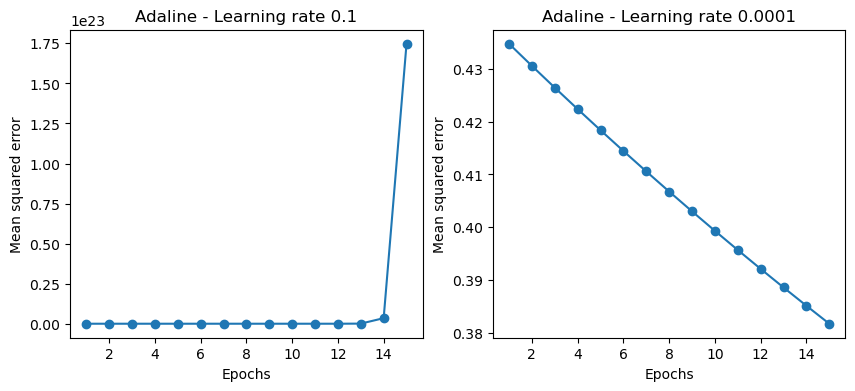

In [12]:
import numpy as np
import matplotlib.pyplot as plt 


# Adaline (Adaptive Linear Neuron) 모델 클래스 정의
class AdalineGD:
    # 모델 초기화
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # 학습률 (step size)
        self.n_iter = n_iter  # 훈련할 반복 횟수
        self.random_state = random_state  # 랜덤 시드를 설정하여 재현 가능하도록 설정
    
    # 훈련 데이터를 기반으로 모델 학습
    # method self를 주는 이유 : 맴버 변수 생성하거나 접근하게 하려고 준다
    def fit(self, X, y): # X : 학습 데이터, y : 원래 답
        rgen = np.random.RandomState(self.random_state)  # 주어진 시드로 랜덤 넘버 생성기 초기화
        # 가중치(w_)를 작은 랜덤 값으로 초기화
        self.w_ = rgen.normal(
            loc=0.0 # 평균
            , scale=0.01 # 표준편차
            , size=X.shape[1]
        )  # 작은 값으로 초기화
        self.b_ = np.float_(0.)  # 바이어스(bias)는 0으로 초기화
        self.losses_ = []  # 각 반복에서의 손실값을 저장할 리스트
        
        # 주어진 반복 횟수만큼 Gradient Descent 수행
        for i in range(self.n_iter):
            # 입력값 X와 가중치 w_의 내적 + 바이어스를 계산하여 순 입력 값 구하기
            net_input = self.net_input(X)
            # 순 입력 값에 활성화 함수 적용 (Adaline은 선형 활성화 함수)
            output = self.activation(net_input)
            # 실제 값(y)와 예측 값(output)의 오차 계산
            errors = (y - output)
            # 가중치 업데이트 (오차에 대한 기울기)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            # 바이어스 업데이트 (오차 평균에 대한 기울기)
            self.b_ += self.eta * 2.0 * errors.mean()
            # 손실값 계산 (평균 제곱 오차)
            loss = (errors ** 2).mean()
            self.losses_.append(loss)  # 손실값을 리스트에 저장
        
        return self  # 훈련된 모델 반환
    
    # 순 입력 계산 (X * 가중치 + 바이어스)
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    # 활성화 함수 (Adaline에서는 항등 함수, 즉 입력 그대로 반환)
    def activation(self, X):
        return X
    
    # 모델을 이용한 예측 함수
    def predict(self, X):
        # 예측값이 0 이상이면 1, 아니면 -1로 반환
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# 붓꽃 데이터셋
import os
import pandas as pd
s= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


df = pd.read_csv(
    s
    , header = None
    , encoding='utf-8'
)

# setosa랑 versicolor를 선택
y=df.iloc[0:100,4].values #품정 추출

# setosa이면 0, versicolor이면 1로 출력

y=np.where(y=='Iris-setosa',0,1)

# 꽃의 길이 df[0],df[2], 꽃의 넓이 : df[1], df[3]
# data 추출 : 꽃받침, 꽃잎의 길이 데이터를 추출
X=df.iloc[0:100,[0,2]].values


# 오차 시각화
fig, ax = plt.subplots(
    nrows=1
    , ncols=2
    , figsize=(10, 4)
)

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(
    range(1, len(ada1.losses_) + 1),
    ada1.losses_,
    marker='o'
)
ax[0].set_xlabel('Epochs') 
ax[0].set_ylabel('Mean squared error')  
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(
    range(1, len(ada2.losses_) + 1),
    ada2.losses_,
    marker='o'
)
ax[1].set_xlabel('Epochs') 
ax[1].set_ylabel('Mean squared error') 
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()


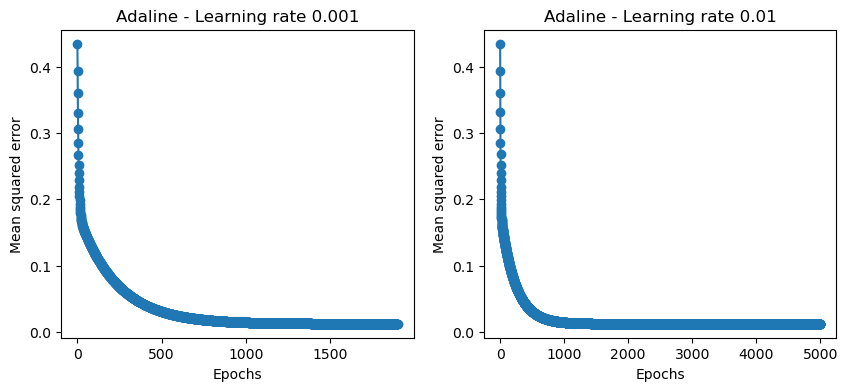

In [31]:
import numpy as np
import matplotlib.pyplot as plt 


# Adaline (Adaptive Linear Neuron) 모델 클래스 정의
class AdalineGD:
    # 모델 초기화
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # 학습률 (step size)
        self.n_iter = n_iter  # 훈련할 반복 횟수
        self.random_state = random_state  # 랜덤 시드를 설정하여 재현 가능하도록 설정
    
    # 훈련 데이터를 기반으로 모델 학습
    # method self를 주는 이유 : 맴버 변수 생성하거나 접근하게 하려고 준다
    def fit(self, X, y): # X : 학습 데이터, y : 원래 답
        rgen = np.random.RandomState(self.random_state)  # 주어진 시드로 랜덤 넘버 생성기 초기화
        # 가중치(w_)를 작은 랜덤 값으로 초기화
        self.w_ = rgen.normal(
            loc=0.0 # 평균
            , scale=0.01 # 표준편차
            , size=X.shape[1]
        )  # 작은 값으로 초기화
        self.b_ = np.float_(0.)  # 바이어스(bias)는 0으로 초기화
        self.losses_ = []  # 각 반복에서의 손실값을 저장할 리스트
        
        # 주어진 반복 횟수만큼 Gradient Descent 수행
        for i in range(self.n_iter):
            # 입력값 X와 가중치 w_의 내적 + 바이어스를 계산하여 순 입력 값 구하기
            net_input = self.net_input(X)
            # 순 입력 값에 활성화 함수 적용 (Adaline은 선형 활성화 함수)
            output = self.activation(net_input)
            # 실제 값(y)와 예측 값(output)의 오차 계산
            errors = (y - output)
            # 가중치 업데이트 (오차에 대한 기울기)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            # 바이어스 업데이트 (오차 평균에 대한 기울기)
            self.b_ += self.eta * 2.0 * errors.mean()
            # 손실값 계산 (평균 제곱 오차)
            loss = (errors ** 2).mean()
            self.losses_.append(loss)  # 손실값을 리스트에 저장
        
        return self  # 훈련된 모델 반환
    
    # 순 입력 계산 (X * 가중치 + 바이어스)
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    # 활성화 함수 (Adaline에서는 항등 함수, 즉 입력 그대로 반환)
    def activation(self, X):
        return X
    
    # 모델을 이용한 예측 함수
    def predict(self, X):
        # 예측값이 0 이상이면 1, 아니면 -1로 반환
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# 붓꽃 데이터셋
import os
import pandas as pd
s= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


df = pd.read_csv(
    s
    , header = None
    , encoding='utf-8'
)

# setosa랑 versicolor를 선택
y=df.iloc[0:100,4].values #품정 추출

# setosa이면 0, versicolor이면 1로 출력

y=np.where(y=='Iris-setosa',0,1)

# 꽃의 길이 df[0],df[2], 꽃의 넓이 : df[1], df[3]
# data 추출 : 꽃받침, 꽃잎의 길이 데이터를 추출
X=df.iloc[0:100,[0,2]].values


# 오차 시각화
fig, ax = plt.subplots(
    nrows=1
    , ncols=2
    , figsize=(10, 4)
)

ada1 = AdalineGD(n_iter=1900, eta=0.001).fit(X, y)
ax[0].plot(
    range(1, len(ada1.losses_) + 1),
    ada1.losses_,
    marker='o'
)
ax[0].set_xlabel('Epochs') 
ax[0].set_ylabel('Mean squared error')  
ax[0].set_title('Adaline - Learning rate 0.001')

ada2 = AdalineGD(n_iter=5000, eta=0.001).fit(X, y)
ax[1].plot(
    range(1, len(ada2.losses_) + 1),
    ada2.losses_,
    marker='o'
)
ax[1].set_xlabel('Epochs') 
ax[1].set_ylabel('Mean squared error') 
ax[1].set_title('Adaline - Learning rate 0.01')

plt.show()


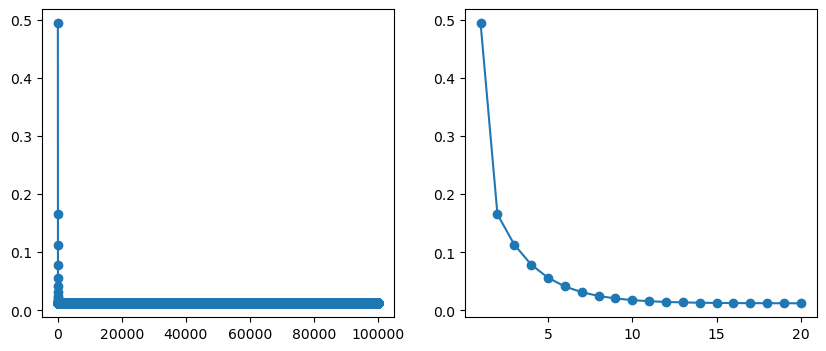

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd


# Adaline (Adaptive Linear Neuron) 모델 클래스 정의
class AdalineGD:
    # 모델 초기화
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # 학습률 (step size)
        self.n_iter = n_iter  # 훈련할 반복 횟수
        self.random_state = random_state  # 랜덤 시드를 설정하여 재현 가능하도록 설정
    
    # 훈련 데이터를 기반으로 모델 학습
    # method self를 주는 이유 : 맴버 변수 생성하거나 접근하게 하려고 준다
    def fit(self, X, y): # X : 학습 데이터, y : 원래 답
        rgen = np.random.RandomState(self.random_state)  # 주어진 시드로 랜덤 넘버 생성기 초기화
        # 가중치(w_)를 작은 랜덤 값으로 초기화
        self.w_ = rgen.normal(
            loc=0.0 # 평균
            , scale=0.01 # 표준편차
            , size=X.shape[1]
        )  # 작은 값으로 초기화
        self.b_ = np.float_(0.)  # 바이어스(bias)는 0으로 초기화
        self.losses_ = []  # 각 반복에서의 손실값을 저장할 리스트
        
        # 주어진 반복 횟수만큼 Gradient Descent 수행
        for i in range(self.n_iter):
            # 입력값 X와 가중치 w_의 내적 + 바이어스를 계산하여 순 입력 값 구하기
            net_input = self.net_input(X)
            # 순 입력 값에 활성화 함수 적용 (Adaline은 선형 활성화 함수)
            output = self.activation(net_input)
            # 실제 값(y)와 예측 값(output)의 오차 계산
            errors = (y - output)
            # 가중치 업데이트 (오차에 대한 기울기)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            # 바이어스 업데이트 (오차 평균에 대한 기울기)
            self.b_ += self.eta * 2.0 * errors.mean()
            # 손실값 계산 (평균 제곱 오차)
            loss = (errors ** 2).mean()
            self.losses_.append(loss)  # 손실값을 리스트에 저장
        
        return self  # 훈련된 모델 반환
    
    # 순 입력 계산 (X * 가중치 + 바이어스)
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    # 활성화 함수 (Adaline에서는 항등 함수, 즉 입력 그대로 반환)
    def activation(self, X):
        return X
    
    # 모델을 이용한 예측 함수
    def predict(self, X):
        # 예측값이 0 이상이면 1, 아니면 -1로 반환
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'  # Iris dataset URL

# Load the data into a DataFrame
df = pd.read_csv(s, header=None, encoding='utf-8')

# Create the target variable
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)  # Convert labels to binary (0 or 1)

# Extract the features (sepal length and petal length)
X = df.iloc[0:100, [0, 2]].values

# Standardize the features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()  # Standardize the first feature (sepal length)
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  # Standardize the second feature (petal length)


ada_gd =AdalineGD(n_iter=20,eta=0.5)
ada_gd.fit(X_std,y)


# 오차 시각화
fig, ax = plt.subplots(
    nrows=1
    , ncols=2
    , figsize=(10, 4)
)

ada1 = AdalineGD(n_iter=100000, eta=0.5).fit(X_std, y) 
ax[0].plot(
    range(1, len(ada1.losses_) + 1),
    ada1.losses_,
    marker='o'
)


ada2 = AdalineGD(n_iter=20, eta=0.5).fit(X_std, y) # 표준화 한 데이터 
ax[1].plot(
    range(1, len(ada2.losses_) + 1),
    ada2.losses_,
    marker='o'
)

plt.show()
